In [1]:
from __future__ import print_function

import sys
if '/opt/ros/kinetic/lib/python2.7/dist-packages' in sys.path:
    sys.path.remove('/opt/ros/kinetic/lib/python2.7/dist-packages')
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import scipy.linalg as linalg

import os
import math

%matplotlib inline

Text(0.5, 1.0, 'Original Image')

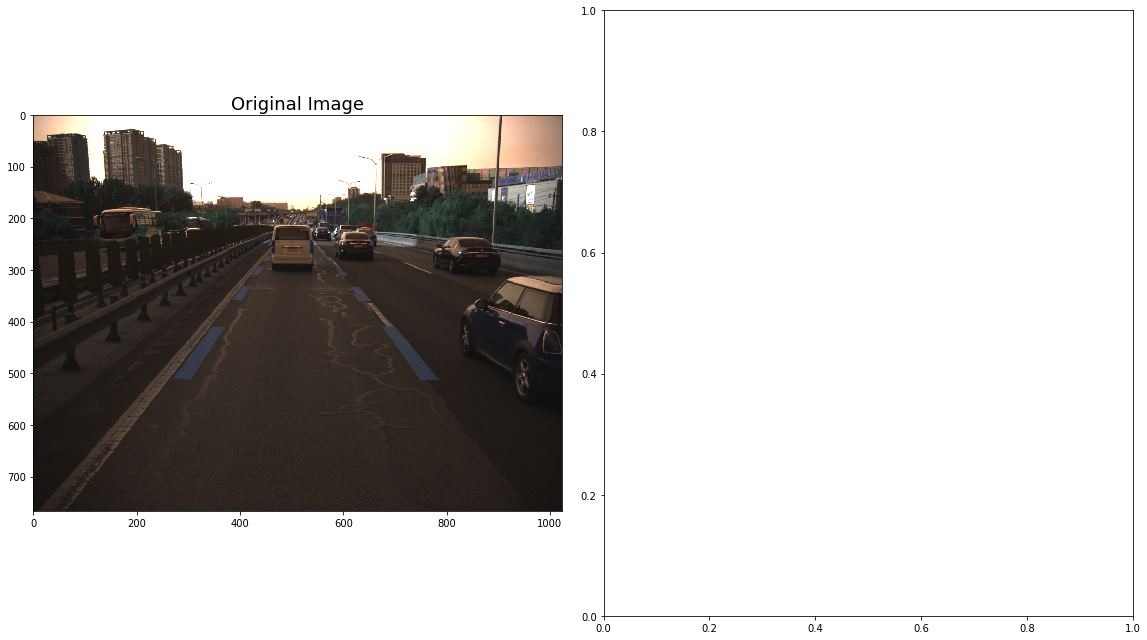

In [2]:
img = cv2.imread('/media/andy/DATA1/08_Data/2018-08-16/image/2018-08-16_15-34-45_00001827.bmp')
f, axs = plt.subplots(1, 2, figsize=(16, 9))
f.tight_layout()
axs[0].imshow(img)
axs[0].set_title('Original Image', fontsize=18)
# axs[1].imshow(img_warp, cmap='gray')
# axs[1].set_title('Warp_Image', fontsize=18)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'img_r250')

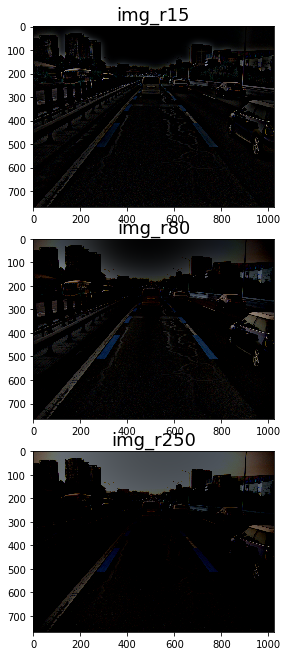

In [4]:
def singleScaleRetinex(img, sigma):

    retinex = np.log10(img) - np.log10(cv2.GaussianBlur(img, (0, 0), sigma))

    return retinex
img_f   = np.float64(img)+1.0
img_r15 = singleScaleRetinex(img_f ,15)
img_r80 = singleScaleRetinex(img_f ,80)
img_r250 = singleScaleRetinex(img_f ,250)

img = cv2.imread('/media/andy/DATA1/08_Data/2018-08-16/image/2018-08-16_15-34-45_00001827.bmp')
f, axs = plt.subplots(3, 1, figsize=(16, 9))
f.tight_layout()
axs[0].imshow(img_r15)
axs[0].set_title('img_r15', fontsize=18)
axs[1].imshow(img_r80)
axs[1].set_title('img_r80', fontsize=18)
axs[2].imshow(img_r250)
axs[2].set_title('img_r250', fontsize=18)


In [ ]:
def preProcess(src):
    lut = np.arange(255)
    mean = cv2.mean(src)
    
    for i in lut:
        lut[i] = 